In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("IRIS.csv")
dataset.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
dataset.drop(columns=["Species"], inplace=True)
dataset.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [4]:
dataset.drop(columns=["ID"], inplace=True)

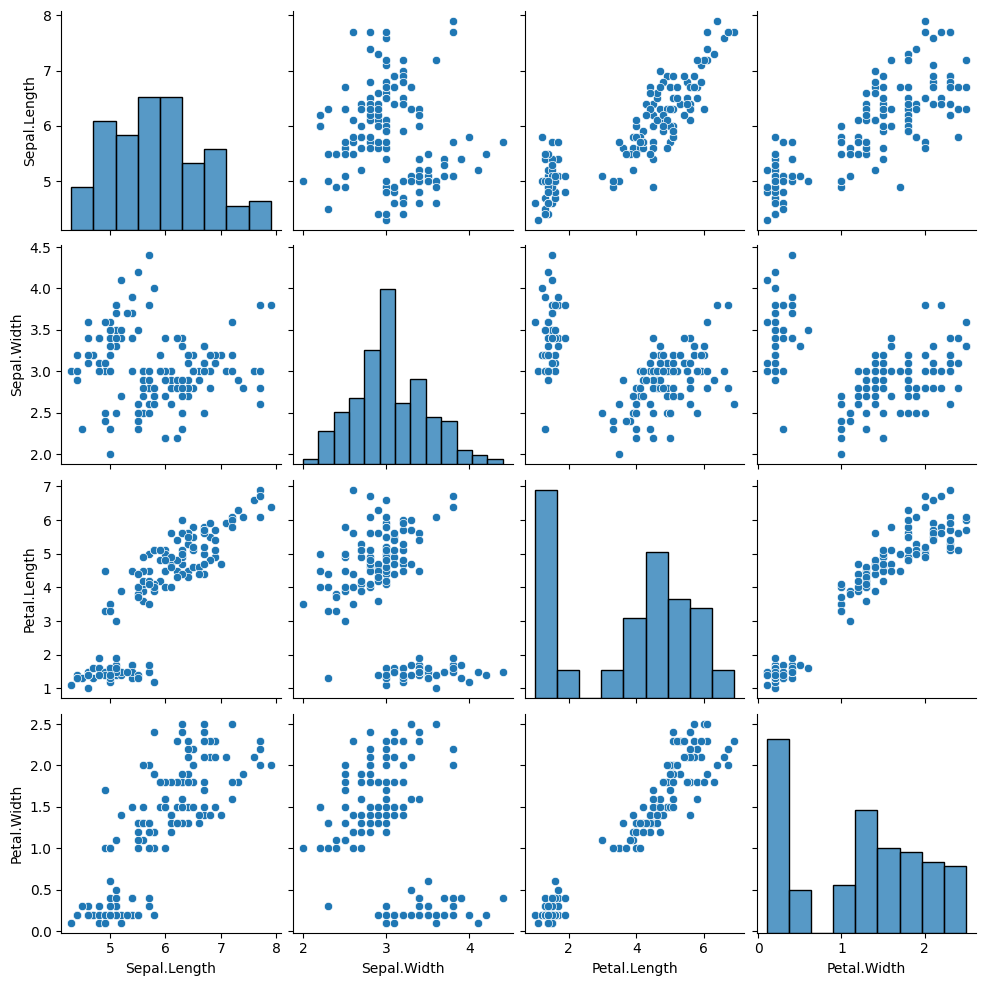

In [5]:
sns.pairplot(data=dataset)
plt.show()

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss=[]

for i in range(2,21):
    km=KMeans( n_clusters=i,init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

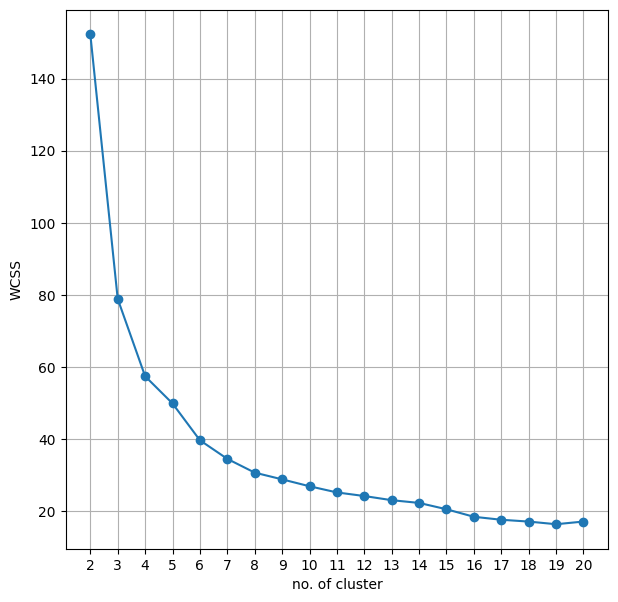

In [15]:
plt.figure(figsize=(7,7))
plt.plot([i for i in range(2,21)],wcss,marker="o")
plt.xlabel("no. of cluster")
plt.xticks([i for i in range(2,21)])
plt.ylabel("WCSS")
plt.grid(axis='x')
plt.grid(axis='y')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

In [16]:
km=KMeans(n_clusters=3)
dataset["Predict"]=km.fit_predict(dataset)

In [21]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [22]:
silhouette_score(dataset,labels=km.labels_)

0.6851559988597147

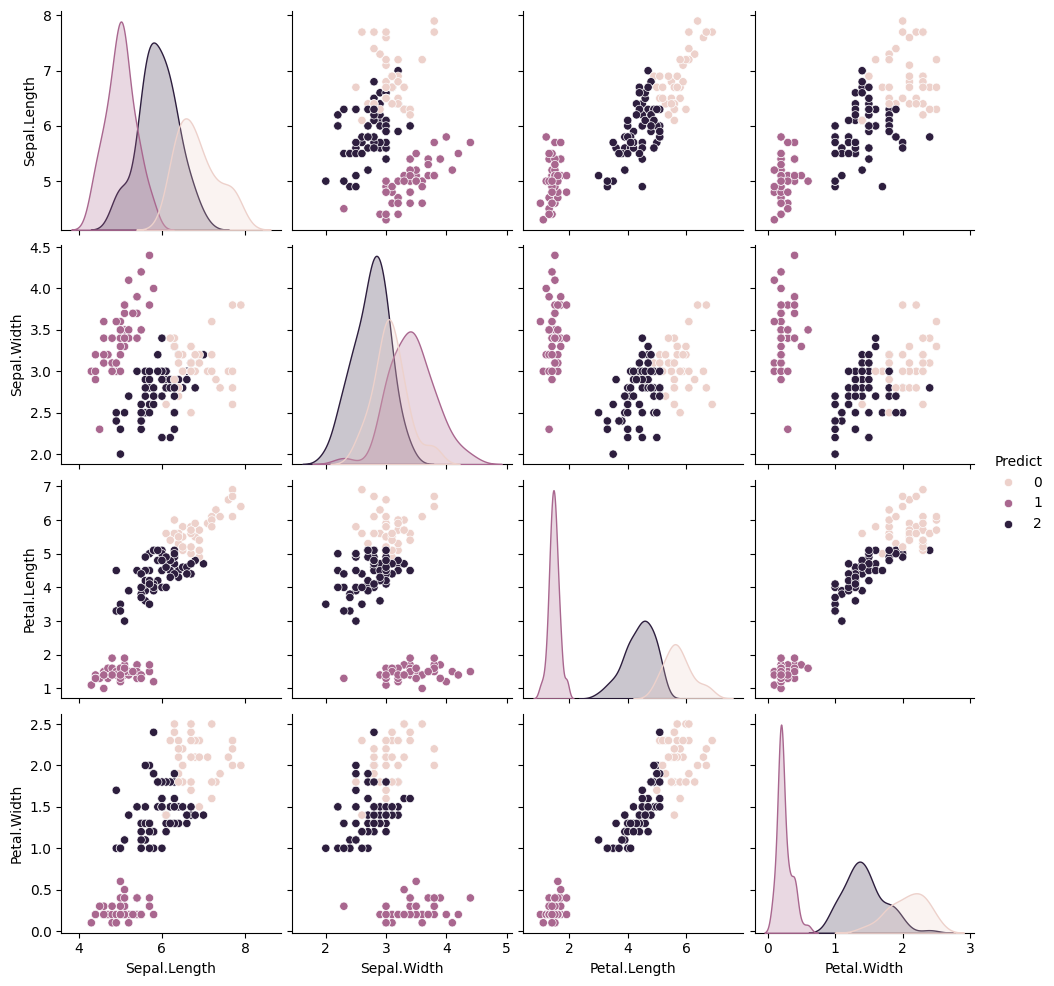

In [17]:
sns.pairplot(data=dataset,hue="Predict")
plt.show()

In [27]:
ss=[]
no_c=[j for j in range(2,21)]
for i in range(2,21):
    km1=KMeans(n_clusters=i)
    km.fit(dataset)
    ss.append(silhouette_score(dataset,km.labels_))

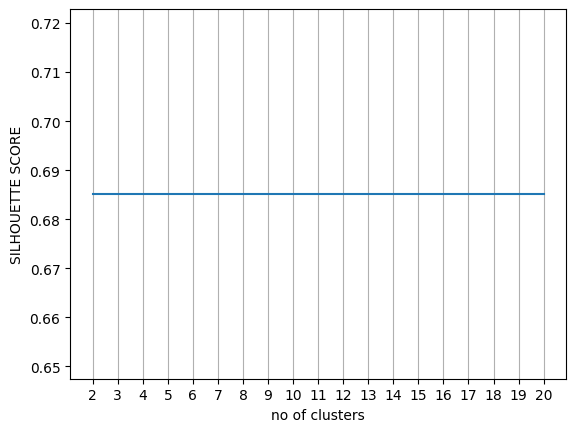

In [30]:
plt.plot(no_c,ss)
plt.xlabel("no of clusters")
plt.ylabel("SILHOUETTE SCORE")
plt.xticks(no_c)
plt.grid(axis="x")
plt.show()